In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
#training dataset
df = pd.read_csv('/content/Tomato_Alternaria_N02_2022.csv')

In [ ]:
df.head()

,sample_date,time,rel_hum_hourly,output_prim,Disease
0,4/11/2022,0:00:00,60.0,0,0
1,4/11/2022,1:00:00,59.5,0,0
2,4/11/2022,2:00:00,59.0,0,0
3,4/11/2022,3:00:00,59.5,0,0
4,4/11/2022,4:00:00,61.5,0,0


In [ ]:
df.shape

(2928, 5)

In [ ]:
df.isna().sum()

sample_date       0
time              0
rel_hum_hourly    0
output_prim       0
Disease           0
dtype: int64

In [ ]:
df['sample_date'] = pd.to_datetime(df['sample_date'], format='%m/%d/%Y')

print(df)

     sample_date      time  rel_hum_hourly  output_prim  Disease
0     2022-04-11   0:00:00            60.0            0        0
1     2022-04-11   1:00:00            59.5            0        0
2     2022-04-11   2:00:00            59.0            0        0
3     2022-04-11   3:00:00            59.5            0        0
4     2022-04-11   4:00:00            61.5            0        0
...          ...       ...             ...          ...      ...
2923  2022-08-10  19:00:00            28.5            0        0
2924  2022-08-10  20:00:00            34.5            0        0
2925  2022-08-10  21:00:00            34.5            0        0
2926  2022-08-10  22:00:00            34.5            0        0
2927  2022-08-10  23:00:00            34.5            0        0

[2928 rows x 5 columns]


In [ ]:
df.describe()

,rel_hum_hourly,output_prim,Disease
count,2928.000000,2928.000000,2928.000000
mean,63.279030,0.047814,0.056011
std,18.597117,0.213409,0.229982
min,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000
50%,63.500000,0.000000,0.000000
75%,79.500000,0.000000,0.000000
max,98.500000,1.000000,1.000000


In [ ]:
df.columns

Index(['sample_date', 'time', 'rel_hum_hourly', 'output_prim', 'Disease'], dtype='object')

In [ ]:
df.columns[df.isnull().any()]

Index([], dtype='object')

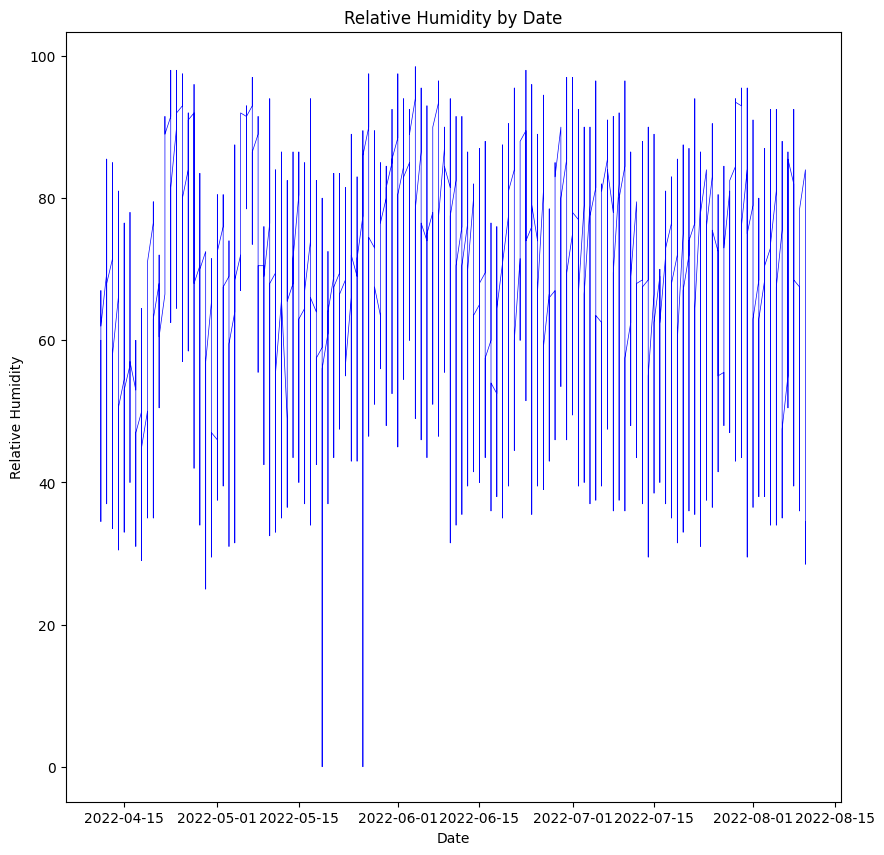

In [ ]:
#  3d chart with date time and relative humidity

plt.figure(figsize=(10,10))
plt.plot(df['sample_date'],df['rel_hum_hourly'],color='blue',linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.title('Relative Humidity by Date')
plt.show()


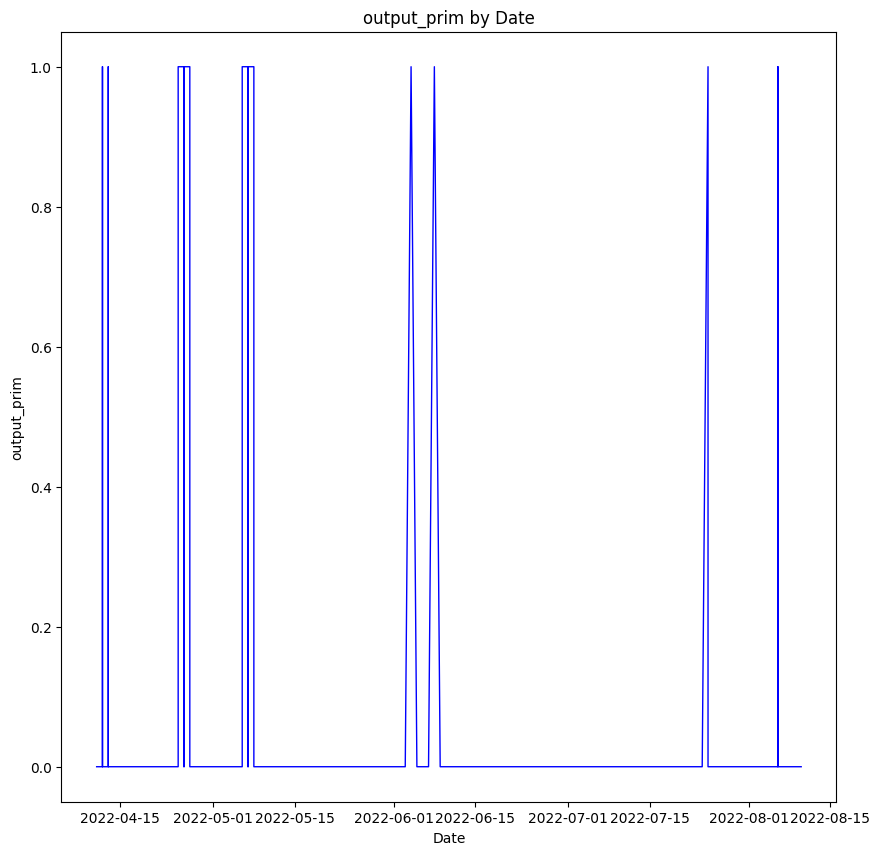

In [ ]:
# 3d chart with date and relative humidity

plt.figure(figsize=(10,10))
plt.plot(df['sample_date'],df['output_prim'],color='blue',linewidth=1)
plt.xlabel('Date')
plt.ylabel('output_prim')
plt.title('output_prim by Date')
plt.show()


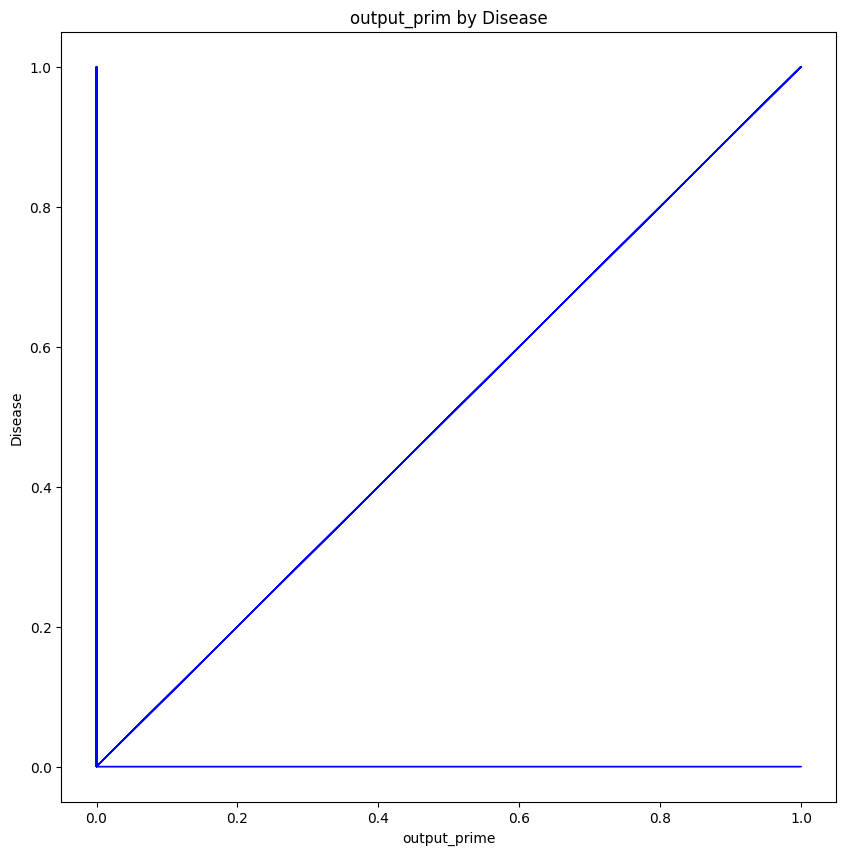

In [ ]:
#  3d chart with date and output_prim

plt.figure(figsize=(10,10))
plt.plot(df['output_prim'],df['Disease'],color='blue',linewidth=1)
plt.xlabel('output_prime')
plt.ylabel('Disease')
plt.title('output_prim by Disease')
plt.show()


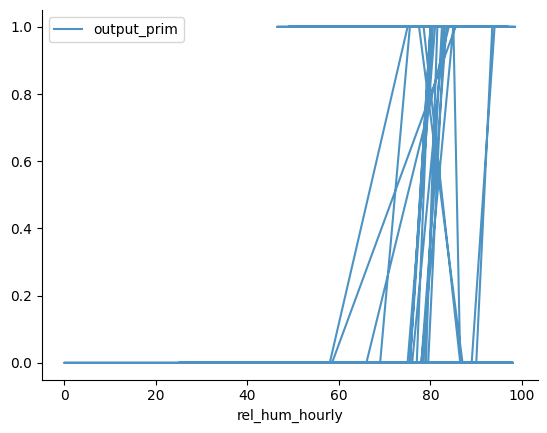

In [ ]:
# line plot of output_prim and relative humidity

df.plot(kind='line', x='rel_hum_hourly', y='output_prim', alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


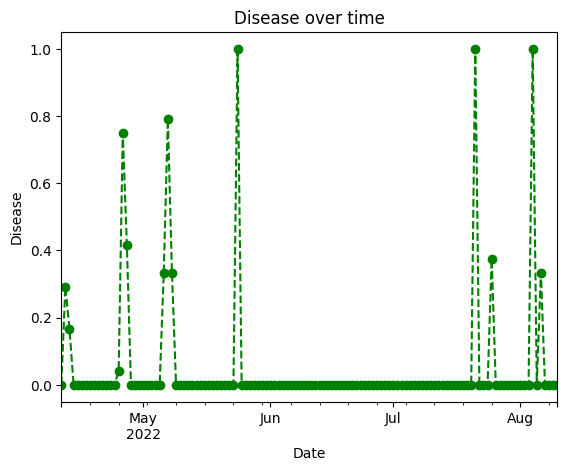

In [ ]:
# scatter date rainfall

df.groupby('sample_date')['Disease'].mean().plot(kind='line', color='green',marker='o', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Disease')
plt.title('Disease over time')
plt.show()


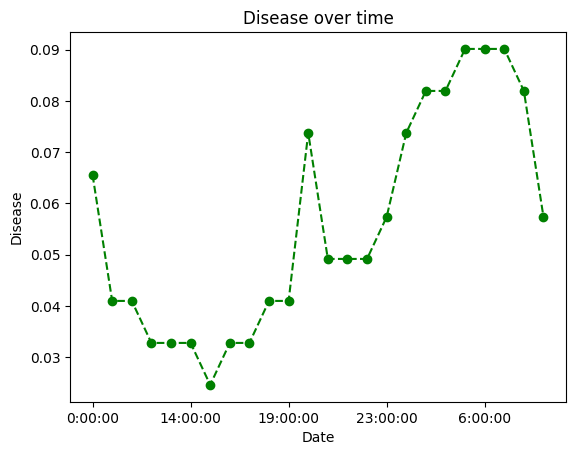

In [ ]:
# scatter disease and time

df.groupby('time')['Disease'].mean().plot(kind='line', color='green',marker='o', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Disease')
plt.title('Disease over time')
plt.show()

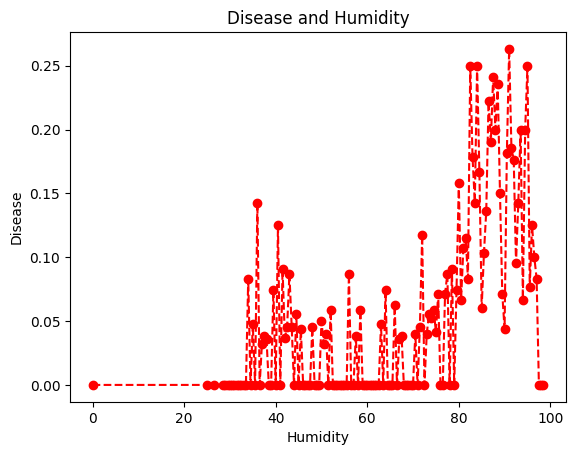

In [ ]:
# scatter disease and humidity

df.groupby('rel_hum_hourly')['Disease'].mean().plot(kind='line', color='red',marker='o', linestyle='dashed')
plt.xlabel('Humidity')
plt.ylabel('Disease')
plt.title('Disease and Humidity')
plt.show()


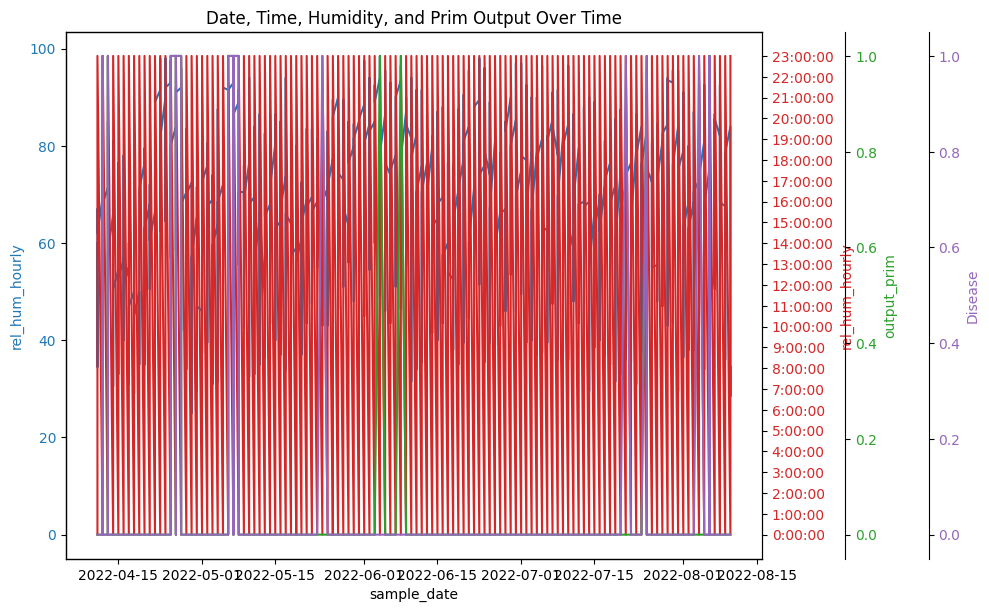

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Rainfall
color = 'tab:blue'
ax1.set_xlabel('sample_date')
ax1.set_ylabel('rel_hum_hourly', color=color)
ax1.plot(df['sample_date'], df['rel_hum_hourly'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis for Temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('rel_hum_hourly', color=color)
ax2.plot(df['sample_date'], df['time'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Creating a third y-axis for Humidity
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('output_prim', color=color)
ax3.plot(df['sample_date'], df['output_prim'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Creating a fourth y-axis for Prim Output
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
color = 'tab:purple'
ax4.set_ylabel('Disease', color=color)
ax4.plot(df['sample_date'], df['Disease'], color=color)
ax4.tick_params(axis='y', labelcolor=color)

# Adjust layout to prevent clipping of the secondary axes
fig.tight_layout()

plt.title('Date, Time, Humidity, and Prim Output Over Time')
plt.show()

In [ ]:
df.rename(columns = {'onset_of_symptoms':'Disease'}, inplace = True)

In [ ]:
df['sample_date'] = df['sample_date'].astype('datetime64[ns]')

SPLITTING DATESET

In [ ]:
df1 = df.drop("sample_date", axis=1)
P = df1[["Disease"]]
X = df1.drop(["Disease"],axis=1)
Y = df1.drop(["Disease"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,P,test_size=0.2,random_state=42)

In [ ]:
print(f'Train: {x_train.shape}, {y_train.shape}')
print(f'Test: {x_test.shape}, {y_test.shape}')

Train: (2342, 3), (2342, 1)
Test: (586, 3), (586, 1)


In [ ]:
x_train['time'] = x_train['time'].astype('datetime64[ns]')
x_test['time'] = x_test['time'].astype('datetime64[ns]')

x_train['time'] = x_train['time'].dt.hour * 60 + x_train['time'].dt.minute
x_test['time'] = x_test['time'].dt.hour * 60 + x_test['time'].dt.minute

Random forest

In [ ]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(x_train,y_train)
tr_pred_rf = model_rf.predict(x_train)
ts_pred_rf = model_rf.predict(x_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rf))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rf))

training accuracy is: 0.9795046968403074
testing accuracy is: 0.9590443686006825


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predictions1 = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.9573378839590444


SVM model

In [ ]:
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(x_test)

# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9573378839590444


In [ ]:
# Importing libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import mode
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
# Suppress scikit-learn warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
df1["time"] = df1["time"].astype("timedelta64[s]")

In [ ]:
# value using LabelEncoder
encoder = LabelEncoder()
df1["Disease"] = encoder.fit_transform(df1["Disease"])

X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24
)
# Initializing Models
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18),
}

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline([("classifier", model)])

# Producing cross-validation score for the models
for model_name, pipeline in pipelines.items():
    scores = cross_val_score(
        pipeline, X, y, cv=10, n_jobs=-1, scoring="accuracy"
    )
    print("=" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.94539249 0.94539249 0.94539249 0.94539249 0.94197952 0.94197952
 0.94197952 0.94197952 0.94520548 0.94520548]
Mean Score: 0.9439899013511617
Gaussian NB
Scores: [0.94539249 0.94539249 0.94539249 0.94539249 0.94197952 0.94197952
 0.94197952 0.94197952 0.94520548 0.94520548]
Mean Score: 0.9439899013511617
Random Forest
Scores: [0.98976109 0.98976109 0.97610922 0.9556314  0.80887372 0.93174061
 0.92832765 0.96587031 0.93150685 0.96575342]
Mean Score: 0.9443335359296834


Accuracy on train data by SVC Classifier: 94.53458582408199
Accuracy on test data by SVC Classifier: 93.85665529010238


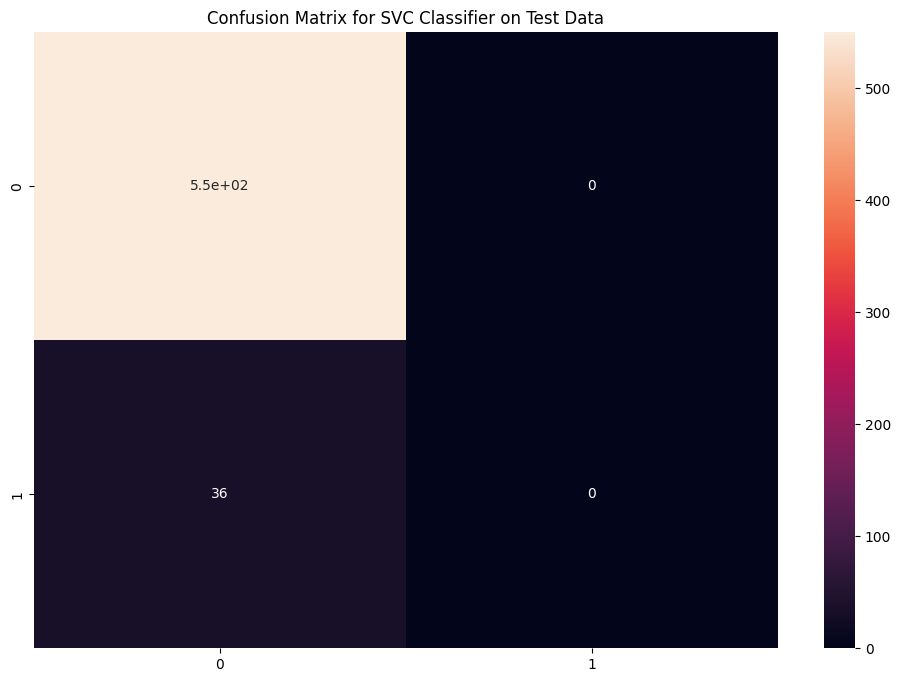

Accuracy on train data by Gaussian NB Classifier: 94.53458582408199
Accuracy on test data by Gaussian NB Classifier: 93.85665529010238


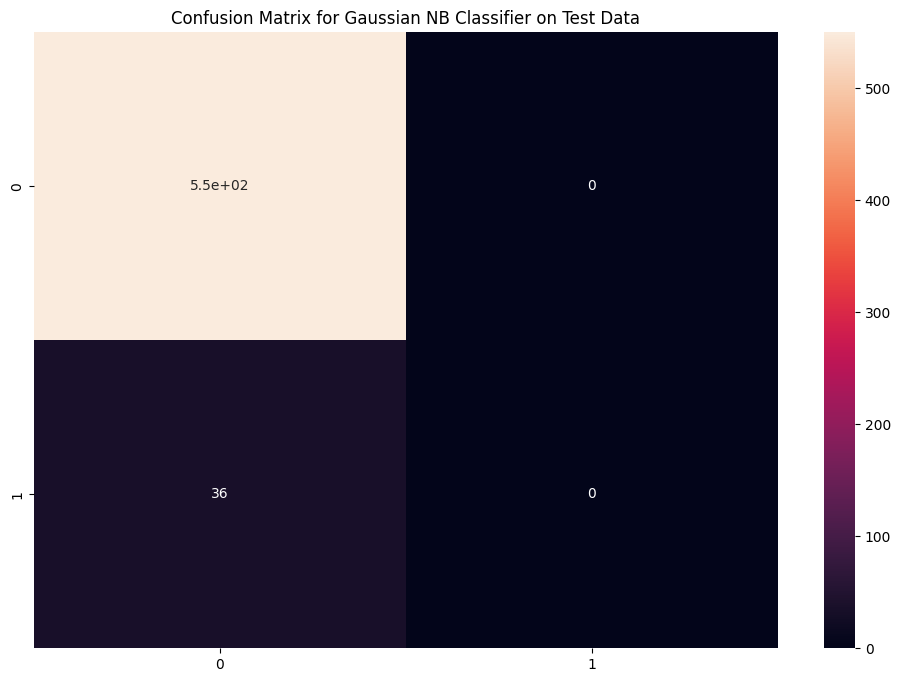

Accuracy on train data by Random Forest Classifier: 98.20666097352691
Accuracy on test data by Random Forest Classifier: 94.88054607508532


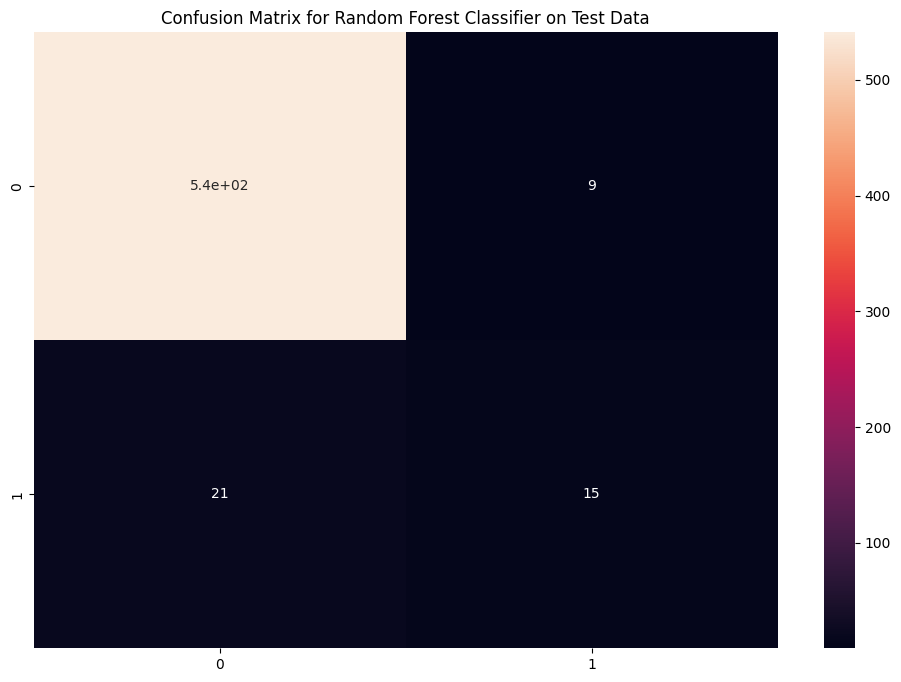

In [ ]:
# Training and testing each model
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    print(f"Accuracy on train data by {model_name} Classifier: {accuracy_score(y_train, pipeline.predict(X_train)) * 100}")
    print(f"Accuracy on test data by {model_name} Classifier: {accuracy_score(y_test, preds) * 100}")

    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name} Classifier on Test Data")
    plt.show()

In [ ]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)


RandomForestClassifier(random_state=18)

Accuracy on Test dataset by the combined model: 93.85665529010238


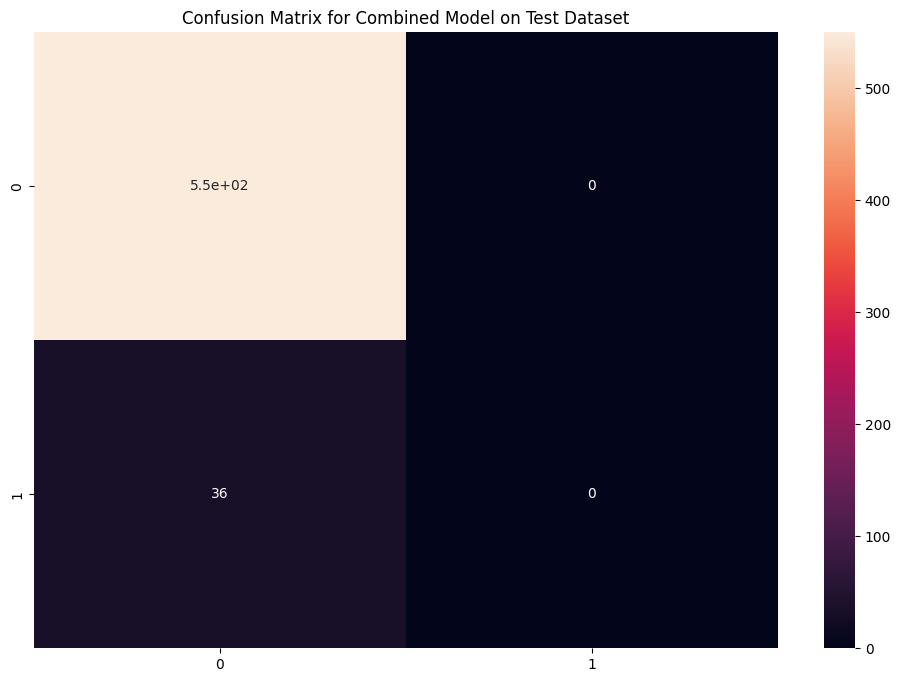

In [ ]:
# Making predictions by taking the mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(X_test)
nb_preds = final_nb_model.predict(X_test)
rf_preds = final_rf_model.predict(X_test)

# Use SciPy's mode function
final_preds, _ = mode([svm_preds, nb_preds, rf_preds], axis=0)

# Calculating and printing accuracy on the test dataset
accuracy = accuracy_score(y_test, final_preds) * 100
print(f"Accuracy on Test dataset by the combined model: {accuracy}")

# Visualizing the confusion matrix
cf_matrix = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()